# A Recurrent Network Mechanism of Time Integration in Perceptual Decisions
Wong,  Wang
Journal of Neuroscience, January 2006, 26(4):1212-1328

## Material and Methods
### The two-variable network model

### Calling Library Fuctions

In [1]:
# LIBRARY

import numpy as np # vector manipulation
import math  # math functions
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


### The Reduced Network Model

In [2]:
def H(x):
    a=270 # Hz/nA
    b=108 # Hz
    d=.154 # seconds
    f=(a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f
x=np.arange(-1,1,0.01)


### Neural Circuit
$$ x_{1}=J_{11}S_1-J_{12}S_2+I_{0}+I_{1}+I_{noise,1}$$
$$ x_{2}=J_{22}S_2-J_{21}S_1+I_{0}+I_{2}+I_{noise,1}$$

where the synaptic couplings are $J_{11}=0.2609$, $J_{22}=0.2609$, $J_{12}=0.0497$ and $J_{21}=0.0497$.
$I_{0}=0.3255 nA$ represents external input 


In [3]:
def total_synaptic_current(S_1,S_2,I_1,I_2,I_noise_1,I_noise_2):
    # Synaptic coupling
    J_11=0.2609 # nA
    J_22=0.2609 # nA
    J_12=0.0497 # nA
    J_21=0.0497 # nA
    I_0=0.3255  # nA
    x_1=J_11*S_1-J_12*S_2+I_0+I_1+I_noise_1
    x_2=J_22*S_2-J_21*S_1+I_0+I_2+I_noise_2
    return x_1, x_2


### Background activity
$$ \tau_{AMPA}\frac{d I_{noise,i}(t)}{dt} =-I_{noise,i}(t)+\eta_i(t)\sqrt{\tau_{AMPA}}\sigma_{noise}$$

In [4]:
def Background_Activity(I_noise):
    h=0.1
    sigma_noise=0.02 # nA
    tau_AMPA=2 #ms
    eta_noise=np.random.normal(0,1,1)
    k=0#(-(I_noise)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    I_noise_new=I_noise+h/tau_AMPA*(-(I_noise+h/2*k)+eta_noise
                                *np.sqrt(tau_AMPA)*sigma_noise)
    return I_noise_new

### Network Dynamics
$$ \frac{d S_{i}}{dt} =-\frac{S_{i}}{\tau_S}+(1-S_{i})\gamma H_{i}$$

In [5]:
def Network_Dynamics(S,x):
    h=0.1/1000 #ms
    gamma=0.641
    tau_S=.100 #s
    k=(-S/tau_S+(1-S)*gamma*H(x)/1)
    S_new=S+h*(-(S+h/2*k)/tau_S+(1-S+h/2*k)*gamma*H(x))
    return S_new

### Input Current Target

$$ I_i=J_{A,ext}\mu_0\left(1+ \frac{c'}{100} \right) $$


In [6]:
def I_input_1(c_dash):
    J_A_ext=5.2/10000 # nA/Hz
    mu_0=30 # Hz
    I_motion=J_A_ext*mu_0*(1+(c_dash)/100)
    return I_motion

$$ I_2=J_{A,ext}\mu_0\left(1- \frac{c'}{100} \right) $$

In [7]:
def I_input_2(c_dash):
    J_A_ext=0.00052 # nA/Hz
    mu_0=30 # Hz
    I_motion=J_A_ext*mu_0*(1-(c_dash)/100)
    return I_motion

In [8]:
gamma=0.641
J_11=0.2609 # nA
J_22=0.2609 # nA
J_12=0.0497 # nA
J_21=0.0497 # nA
I_0=0.3255  # nA
a=270 # Hz/nA
b=108 # Hz
tau_S=.100 #s
D=(a*gamma*I_0-gamma*b)

S_L=np.arange(0,1,0.001)

S_R=(-S_L/tau_S+gamma*a*J_12*S_L+gamma*a*J_11*S_L*S_L+a*gamma*I_0-gamma*b)/(a*gamma*I_0-gamma*b*J_12*S_L)




### Plotting
#### Input

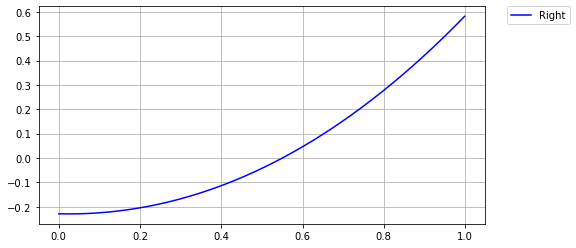

In [9]:
fig = plt.figure(figsize=(8,4))

plt.plot(S_L,S_R,'-',color='blue',label="Right")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Example_Firing_Pattern.png', bbox_inches='tight',dpi=300)

# plt.
#plt.ylim((30,50))
plt.show()


In [11]:
from scipy.optimize import curve_fit
from scipy.stats import norm

Prob=np.zeros(len(Vector_coherence))
def func_temp(coh,alpha,beta):
    return 1-0.5*np.exp(-(coh/alpha)**beta)

#Vector_coh=[0.01,0.03,0.05,0.075,0.1,.15]
popr, pcov=curve_fit(func_temp,Prob,Vector_coherence)

mu,sigma=curve_fit(norm.cdf,Vector_coherence,Prob,p0=[0,1])[0]


fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(Vector_coherence,Prob,'o:',label='Model data')
#Vector_coh=np.arange(np.min(Vector_coherence),np.max(Vector_coherence),0.1)
Vector_coh=np.arange(-10,10,0.1)
Vector_coh=np.arange(0,0.15,0.001)
plt.plot(Vector_coh*100,func_temp(Vector_coh,*popr),'k',label='Fit: a= %0.4f, b= %0.4f'% tuple(popr))
#plt.plot(Vector_coh,norm.cdf(Vector_coh,mu,sigma),'k',label='Fit: mu= %2.4f, sigma= %2.4f'% (mu,sigma))

plt.legend()



plt.xlabel('Coherence')
plt.ylabel('Probability')
#plt.xscale('log')
plt.ylim(0,1)
plt.subplot(122)
plt.plot((Vector_coherence),RT_coh_hit,'o:',color='blue',label="Correct")
plt.plot((Vector_coherence),RT_coh_miss,'o:',fillstyle='none',color='red',label="Incorrect")
#plt.xscale('log')
plt.legend()
#plt.ylim(0,700)
plt.xlabel('Coherence')
plt.ylabel('Reaction Time')
plt.savefig('Behavioural.png', bbox_inches='tight',dpi=300)
plt.show()

NameError: name 'Vector_coherence' is not defined

In [ ]:
from scipy.optimize import curve_fit
from scipy.stats import norm
def func_temp(coh,alpha,beta):
    return 1-0.5*np.exp(-(coh/alpha)**beta)

#Vector_coh=[0.01,0.03,0.05,0.075,0.1,.15]
popr, pcov=curve_fit(func_temp,Prob,Vector_coherence)

In [ ]:
fig = plt.figure(figsize=(10,4))
plt.plot(Vector_coherence,Prob,'o:')
Vector_coh=np.arange(0,0.15,0.001)
plt.plot(Vector_coh*100,func_temp(Vector_coh,*popr),'k')
plt.xlabel('Coherence')
plt.ylabel('Probability')
plt.xscale('log')
#plt.ylim(0,1)